In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let us use the data from the slides (lecture 2) commute example
# We'll try to predict commute time using only the distance, ignoring the day of the week
x = np.array([2.7, 4.1, 1.0, 5.2, 2.8])
y = np.array([25., 33., 15., 45., 22.])

# We'll use these quantities for the closed form solution of w
N = len(x)
x_bar = np.mean(x)
y_bar = np.mean(y)
x2_bar = np.mean(x**2)
xy_bar = np.mean(x * y)

# See the closed form solution for w1 and w0 on the slides
w1 = (xy_bar - x_bar * y_bar)/(x2_bar - x_bar ** 2)
w0 = y_bar - w1 * x_bar

# Predicted values are in yhat
yhat = w0 + w1 * x

<IPython.core.display.Javascript object>


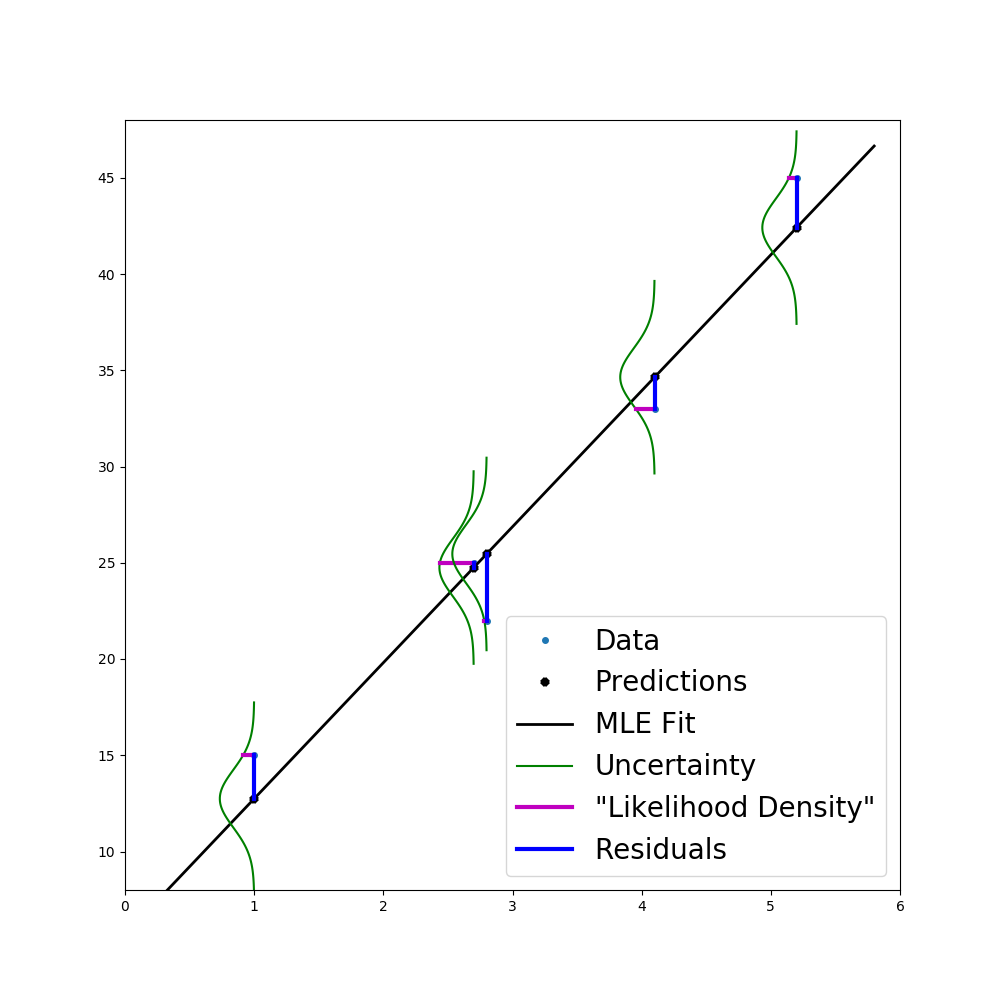

In [3]:
def pdfnorm(mu=0.0, sigma=1.0):
    def f(x):
        return np.exp(-0.5 * (x - mu)**2 / sigma**2)/np.sqrt(np.pi * 2 * sigma**2)
    return f

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.set_title('Maximum Likelihood Estimation (MLE)', fontsize=25)

# Set axes limits to capture most of the data
xmin, xmax = (0, 6)
ymin, ymax = (8, 48)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


# Plot the actual data and the predictions at the corresponding points
ax.plot(x, y, ls='', markersize=4, marker='o',label='Data')
ax.plot(x, yhat, ls='', markersize=4, c='k', marker='x', markeredgewidth=4, label='Predictions')

# Plot the entire least square fit line
ax.plot([xmin + 0.2, xmax - 0.2], [w0 + w1 * (xmin + 0.2), w0 + w1*(xmax - 0.2)], c='k', lw='2', label='MLE Fit')

# Show the uncertainty in the y observations
ufunc = pdfnorm(sigma=1.5)
t_x = np.linspace(-5, 5, 100)
t_y = ufunc(t_x)
for i in range(N):
    uncertainty_label = 'Uncertainty' if i == 0 else None
    ll_label = '"Likelihood Density"' if i == 0 else None
    #if i == 0: uncertainty_label = 'Uncertainty'
    plt.plot(-t_y + x[i], t_x + yhat[i], c='g', ls='-', label=uncertainty_label)
    plt.plot([-ufunc(yhat[i] - y[i]) + x[i], x[i]], [y[i], y[i]], c='m', lw=3, label=ll_label)


# Plot the residuals 
for i in range(N):
    # We'll only add a label to the first line to get a useful legend
    residual_label = 'Residuals' if i == 0 else None 
    ax.plot([x[i], x[i]], [yhat[i], y[i]], c='blue', ls='-', lw=3, label=residual_label)
    
ax.legend(loc='lower right', fontsize=20)

plt.show()

<IPython.core.display.Javascript object>


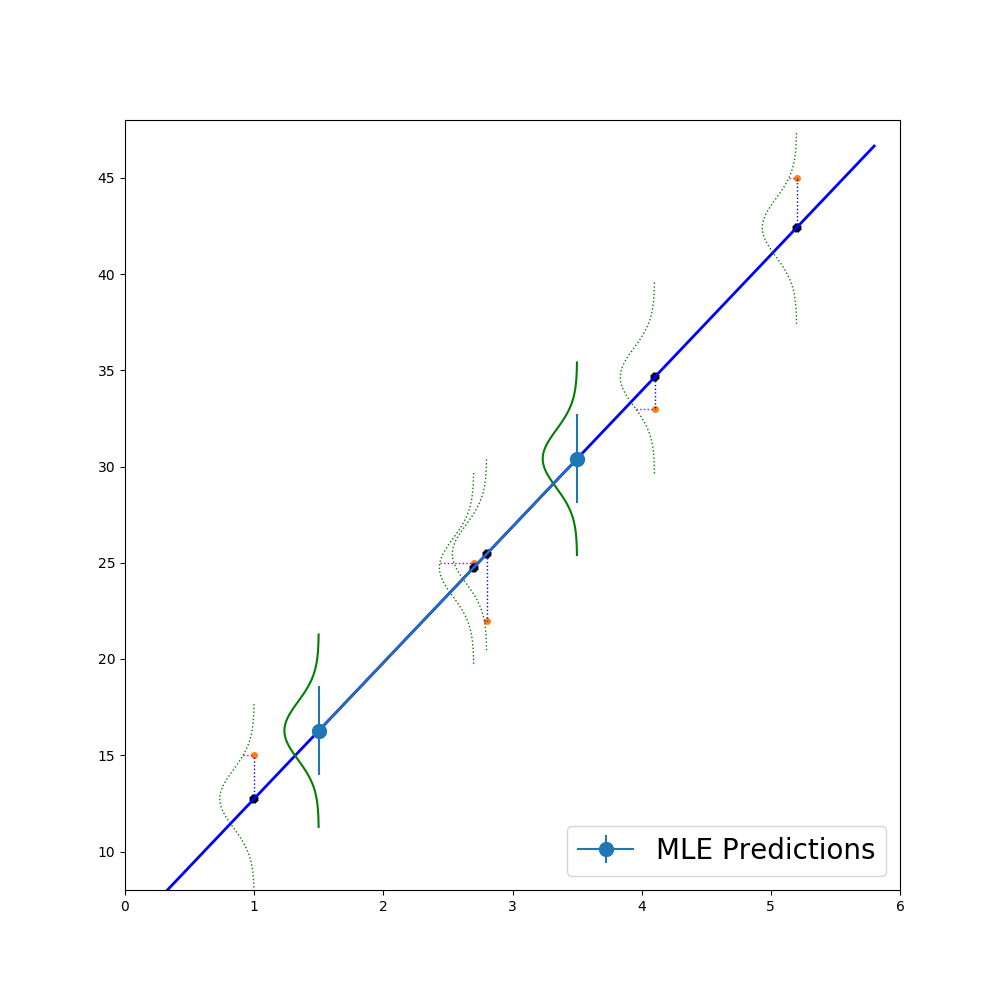

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.set_title('Maximum Likelihood Estimation (MLE)', fontsize=25)

# Set axes limits to capture most of the data
xmin, xmax = (0, 6)
ymin, ymax = (8, 48)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

x_new = [1.5, 3.5] 
yhat_new = [w0 + w1 * t for t in x_new]

sigma2_mle = np.linalg.norm(yhat - y)**2/N
yerrs=[np.sqrt(sigma2_mle) for t in x_new]

ax.errorbar(x_new, yhat_new, yerr=yerrs, marker='o', markersize='10', label='MLE Predictions')

# Plot the new point along with error bars
ax.plot(x, y, ls='', markersize=4, marker='o')
ax.plot(x, yhat, ls='', markersize=4, c='k', marker='x', markeredgewidth=4)

# Plot the entire least square fit line
ax.plot([xmin + 0.2, xmax - 0.2], [w0 + w1 * (xmin + 0.2), w0 + w1*(xmax - 0.2)], c='b', lw='2') #, label='MLE Fit')

# Show the uncertainty in the y observations
ufunc = pdfnorm(sigma=1.5)
t_x = np.linspace(-5, 5, 100)
t_y = ufunc(t_x)

for i in range(len(x_new)):
    plt.plot(-t_y + x_new[i], t_x + yhat_new[i], c='g', ls='-')

for i in range(N):
    uncertainty_label = 'Uncertainty' if i == -1 else None
    ll_label = '"Likelihood Density"' if i == -1 else None
    #if i == 0: uncertainty_label = 'Uncertainty'
    plt.plot(-t_y + x[i], t_x + yhat[i], c='g', ls=':', lw=1)
    plt.plot([-ufunc(yhat[i] - y[i]) + x[i], x[i]], [y[i], y[i]], c='m', lw=1, ls=':', label=ll_label)


# Plot the residuals 
for i in range(N):
    # We'll only add a label to the first line to get a useful legend
    residual_label = 'Residuals' if i == -1 else None 
    ax.plot([x[i], x[i]], [yhat[i], y[i]], c='blue', ls=':', lw=1, label=residual_label)
    
ax.legend(loc='lower right', fontsize=20)

plt.show()